# Esercitazione 9

**29 Aprile 2024**

*Gradiente e gradiente coniugato*

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [2]:
import numpy.linalg as npl
def steepestdescent(A,b,x0,itmax,tol):
    n,m = A.shape
    if n!=m:
        print("Matrice non quadrata")
        return None,None,None,None
    
    it=0
    x = x0
    r=A@x-b
    p=-r
    nb=npl.norm(b)
    arresto=npl.norm(r)/nb
    v_sol=[]
    v_sol.append(x)
    v_r=[]
    v_r.append(arresto)

    while it < itmax and arresto >= tol:
        it+=1
        Ap=A@p
        num=-(r.T@p)
        alfa=num/(p.T@Ap)
        
        #ora devo aggiornare la soluzione all'iterazione k
        x=x+alfa*p
        #sappiamo che aggiornare significa fare r_k = r_k-1 + alfa * Ap
        r=r+alfa*Ap
        v_sol.append(x)
        arresto=npl.norm(r)/nb
        v_r.append(arresto)
        p=-r

    return x,v_r,v_sol,it



In [3]:
import numpy as np
import matplotlib.pyplot as plt
A=np.array([[8,4],[4,3]])
b=np.array([[8],[10]])
x0=np.zeros_like(b)
itmax=200
tol=1e-10
xG,v_r,v_sol,it=steepestdescent(A,b,x0,itmax,tol)

[[-2.]
 [ 6.]] 83


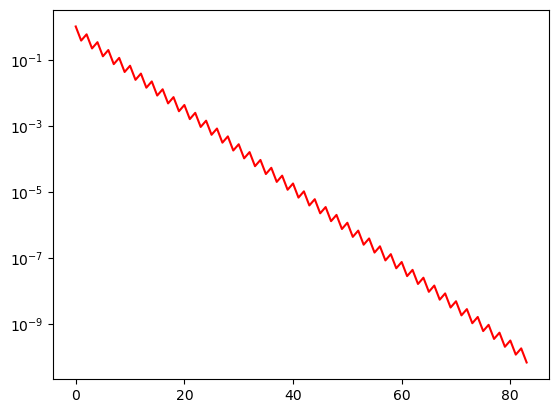

In [4]:
print(xG, it)
plt.semilogy(np.arange(it+1,), v_r, '-r')

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

In [5]:
def f(x,A,b):
    Ax=A@x
    xTAx=x.T@Ax
    bx=b.T@x
    return 0.5*xTAx-bx

In [6]:
def steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol):
    n,m = A.shape
    if n!=m:
        print("Matrice non quadrata")
        return None,None,None,None
    
    it=0
    x = x0
    # il .flatten serve perché il risultato è un vettore in doppia quadra
    plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1], 'ro')
    r=A@x-b
    p=-r
    nb=npl.norm(b)
    arresto=npl.norm(r)/nb
    v_sol=[]
    v_sol.append(x)
    v_r=[]
    v_r.append(arresto)

    while it < itmax and arresto >= tol:
        it+=1
        Ap=A@p
        num=-(r.T@p)
        alfa=num/(p.T@Ap)
        
        #ora devo aggiornare la soluzione all'iterazione k
        x=x+alfa*p
        #disegno la curva di livello per ogni vettore di x_k calcolato
        plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1], 'ro')
        #sappiamo che aggiornare significa fare r_k = r_k-1 + alfa * Ap
        r=r+alfa*Ap
        v_sol.append(x)
        arresto=npl.norm(r)/nb
        v_r.append(arresto)
        p=-r

    return x,v_r,v_sol,it

/var/folders/yg/ktb8lbt91lgcz8svyyr23xr80000gn/T/ipykernel_12436/805164154.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j]=f(np.array([[x_coor],[y_coor]]),A,b)


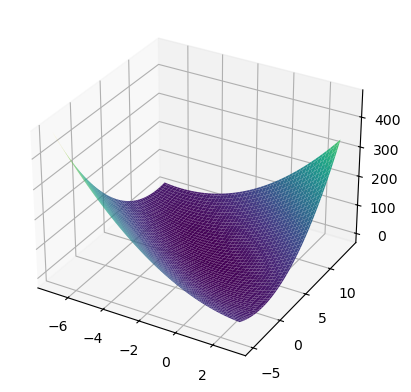

In [7]:
import mpl_toolkits.mplot3d as Axes3D
#discretizzo gli assi X e Y
x=np.linspace(-7.0,3.0,100)
y=np.linspace(-5.0,14.0,100)
#creo la griglia con il metodo np.meshgrid
X,Y=np.meshgrid(x,y)
Z=np.zeros_like(X)

for i in range(len(y)):
    for j in range(len(x)):
        x_coor=X[i][j]
        y_coor=Y[i][j]
        Z[i][j]=f(np.array([[x_coor],[y_coor]]),A,b)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis)
plt.show()

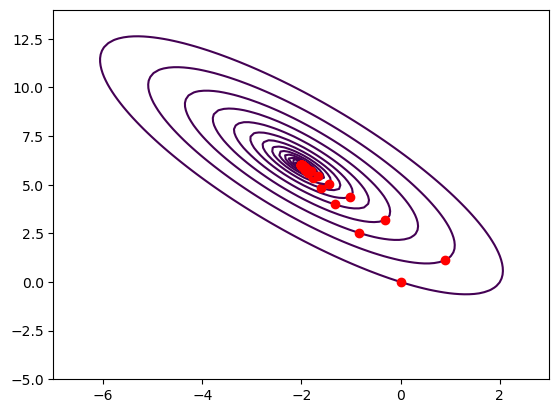

In [8]:
xG,v_r,v_sol,it=steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol)

## Esercizio 2
Implementare la funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [9]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m = A.shape
    if n!=m:
        print("Matrice non quadrata")
        return None,None,None,None
    
    it=0
    x = x0
    r_k=A@x-b
    p=-r_k
    nb=npl.norm(b)
    arresto=npl.norm(r_k)/nb
    v_sol=[]
    v_sol.append(x)
    v_r=[]
    v_r.append(arresto)

    while it < itmax and arresto >= tol:
        it+=1
        Ap=A@p
        num=-(r_k.T@p)
        alfa=num/(p.T@Ap)
        
        #ora devo aggiornare la soluzione all'iterazione k
        x=x+alfa*p
        #sappiamo che aggiornare significa fare r_k = r_k-1 + alfa * Ap
        r_k1=r_k+alfa*Ap
        gamma=(r_k1.T @ r_k1) / (r_k.T @ r_k)
        v_sol.append(x)
        arresto=npl.norm(r_k1)/nb
        v_r.append(arresto)
        p=-r_k1 + gamma*p
        r_k = r_k1

    return x,v_r,v_sol,it

In [10]:
A=np.array([[8,4],[4,3]])
b=np.array([[8],[10]])
x0=np.zeros_like(b)
itmax=200
tol=1e-10
xG,v_r,v_sol,it=conjugate_gradient(A,b,x0,itmax,tol)
print(xG,it)

[[-2.]
 [ 6.]] 2


## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

In [11]:
def conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol):
    n,m = A.shape
    if n!=m:
        print("Matrice non quadrata")
        return None,None,None,None
    
    it=0
    x = x0
    # il .flatten serve perché il risultato è un vettore in doppia quadra
    plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1], 'ro')

    r_k=A@x-b
    p=-r_k
    nb=npl.norm(b)
    arresto=npl.norm(r_k)/nb
    v_sol=[]
    v_sol.append(x)
    v_r=[]
    v_r.append(arresto)

    while it < itmax and arresto >= tol:
        it+=1
        Ap=A@p
        num=-(r_k.T@p)
        alfa=num/(p.T@Ap)
        
        #ora devo aggiornare la soluzione all'iterazione k
        x=x+alfa*p
        #disegno la curva di livello per ogni vettore di x_k calcolato
        plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1], 'ro')
        #sappiamo che aggiornare significa fare r_k = r_k-1 + alfa * Ap
        r_k1=r_k+alfa*Ap
        gamma=(r_k1.T @ r_k1) / (r_k.T @ r_k)
        v_sol.append(x)
        arresto=npl.norm(r_k1)/nb
        v_r.append(arresto)
        p=-r_k1 + gamma*p
        r_k = r_k1

    return x,v_r,v_sol,it

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi  $ \frac{||r^{(k)}||_2} {||b||_2}$ ad ogni iterazione.

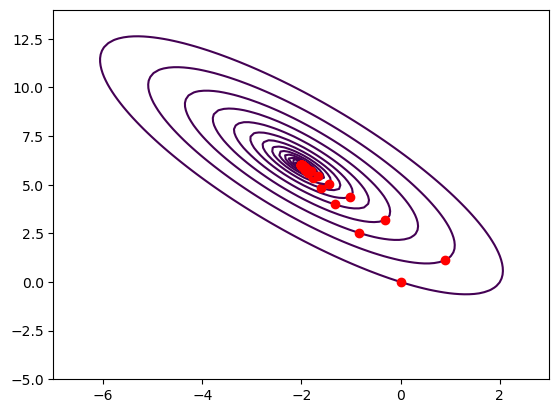

In [12]:
A=np.array([[8,4],[4,3]])
b=np.array([8, 10])
x0=np.zeros_like(b)
itmax=200
tol=1e-10
x1,v_r1,v_sol1,it1=steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol)

iterazioni a confronto: 2 	 83
vettori residui:
 [1.0, 0.3746556473829201, 0.5790132732281492, 0.21693059272459586, 0.3352563705743754, 0.12560569255679083, 0.1941178884968586, 0.07272736318339602, 0.11239683401070294, 0.0421101086100705, 0.06507925876101807, 0.024382311822309786, 0.03768175463447878, 0.014117682177104981, 0.021818236091889532, 0.00817432536776025, 0.012633048295629482, 0.004733042887618755, 0.007314702644501714, 0.0027404946546893474, 0.004235309920883536, 0.0015867827802759258, 0.00245230066042643, 0.0009187682915096276, 0.0014199146323330602, 0.0005319790358052238, 0.0008221494189717095, 0.0003080229228103374, 0.0004760354261614308, 0.000178349360765715, 0.00027563083027428684, 0.00010326664715510469, 0.00015959390923970724, 5.97927593845735e-05, 9.240699177615902e-05, 3.462080132660505e-05, 5.350487477748052e-05, 2.0045903497899043e-05, 3.098003267857125e-05, 1.1606844199134135e-05, 1.793785012593457e-05, 6.720516851589813e-06, 1.0386253316093347e-05, 3.89126846002

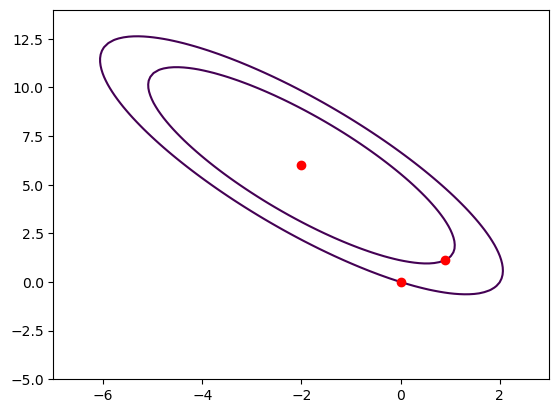

In [13]:
x2,v_r2,v_sol2,it2=conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol)
print("iterazioni a confronto:",it2,"\t",it1)
print("vettori residui:\n", v_r1,"\n",v_r2)

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [14]:
def creaPoisson(n):
    matD=np.diag([4]*n)+np.diag([-1]*(n-1),k=-1)+np.diag([-1]*(n-3),k=-3)
    mat11=np.diag([-1]*(n-1),k=1)
    mat31=np.diag([-1]*(n-3),k=3)
    P = mat11+matD+mat31
    return P

In [15]:
A=[]
for i in range(100,101,2):
    A.append(creaPoisson(i))

itmax=200   
tol=1e-10

for m in A:
    b=np.sum(m,axis=1)
    x0=np.zeros_like(b)
    x,r,sol,it=steepestdescent(m,b,x0,itmax,tol)
    xG,rG,solG,itG=conjugate_gradient(m,b,x0,itmax,tol)
    #print("differenza tra soluzioni:",np.abs(xG-x))
    print("iterazioni gradiente:",it)
    print("iterazioni gradiente congiunto:",itG)

#il metodo del gradiente congiunto ci mette sempre un numero significativo di passi in meno

iterazioni gradiente: 200
iterazioni gradiente congiunto: 34


## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

vettore residui metodo del gradiente:
 [1.0, 0.05607632786566576, 0.022941471384131266, 0.0015218988659960674, 0.001328439313121348, 0.0010902287219386633, 0.0011856435779116444, 0.0010039463682607872, 0.0011177235101136793, 0.0009577276346387128, 0.0010750251006674046, 0.0009247076329059308, 0.0010406484562208204, 0.0008962069777312533, 0.0010093726253032984, 0.0008695875038206811, 0.0009796265927825693, 0.0008440534268893222, 0.0009509302163937071, 0.0008193555368475327, 0.0009231251795361488, 0.0007954056803686221, 0.0008961480586773961, 0.0007721633445883702, 0.0008699637211438592, 0.0007496023961548237, 0.0008445458008574845, 0.0007277013283232584, 0.0008198709678861869, 0.0007064403935598937, 0.0007959172372131188, 0.0006858007523471804, 0.0007726634603496163, 0.0006657642125389594, 0.0007500891635830363, 0.0006463131419169397, 0.000728174488068785, 0.0006274304317718471, 0.0007069001601007887, 0.0006090994757365399, 0.0006862474705719514, 0.000591304153390601, 0.0006661982574705

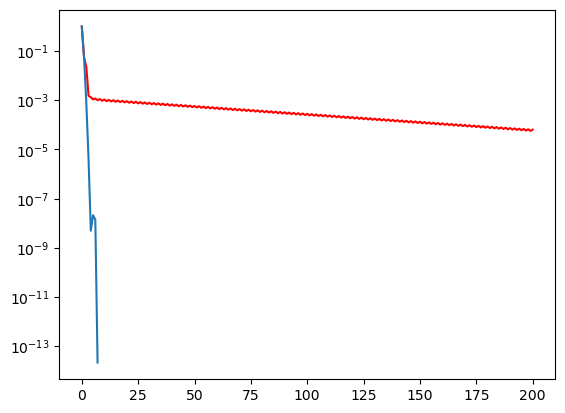

In [20]:
import scipy.linalg as spl
A=spl.hilbert(5)
b=np.sum(A,axis=1)
x0=np.zeros_like(b)
itmax=200   
tol=1e-10

x,r,sol,it=steepestdescent(A,b,x0,itmax,tol)
xG,rG,solG,itG=conjugate_gradient(A,b,x0,itmax,tol)
print("vettore residui metodo del gradiente:\n", r)
print("vettore residui metodo del gradiente congiunto:\n", rG)

plt.semilogy(np.arange(it+1), r, '-r', rG, '-')
plt.show()

#il metodo del gradiente congiunto oltre a metterci meno passi ha un
#vettore dei residui il cui valore si abbassa drasticamente ad ogni passo


## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

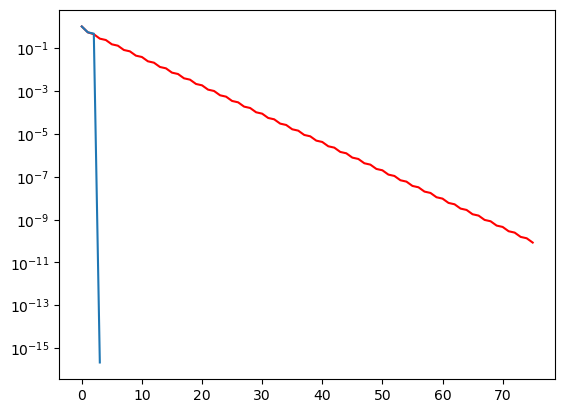

In [17]:
import creaG as c
n=6         #dimensione di G
m=(n-2)**2  #dimensione di D -> m = 16, n = 6 / m = 400, n = 22
G=c.numgrid(n)
D=c.delsq(G).todense().getA()
b=np.sum(D,axis=1)
x0=np.zeros_like(b)
x,r,sol,it=steepestdescent(D,b,x0,itmax,tol)
xG,rG,solG,itG=conjugate_gradient(D,b,x0,itmax,tol)
plt.semilogy(np.arange(it+1), r, '-r', rG, '-')
plt.show()


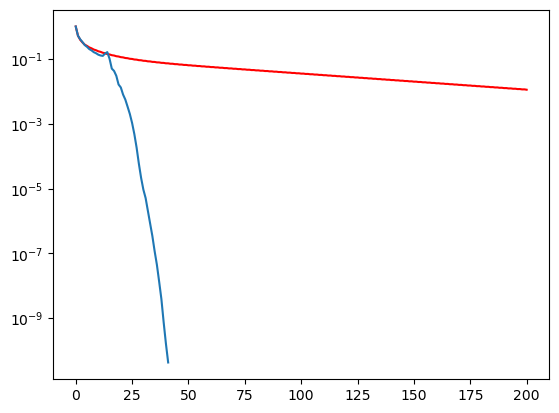

In [19]:
n=22       #dimensione di G
m=(n-2)**2  #dimensione di D -> m = 16, n = 6 / m = 400, n = 22
G=c.numgrid(n)
D=c.delsq(G).todense().getA()
b=np.sum(D,axis=1)
x0=np.zeros_like(b)
x,r,sol,it=steepestdescent(D,b,x0,itmax,tol)
xG,rG,solG,itG=conjugate_gradient(D,b,x0,itmax,tol)
plt.semilogy(np.arange(it+1), r, '-r', rG, '-')
plt.show()